# Resultados do ecocardiograma

Dados do ecocardiograma de 131 pacientes que sofreram um ataque cardíaco. As seguintes variáveis estão presentes nos dados:

1. **survival**: número de meses vividos depois do ataque cardíaco
2. **still-alive**: 0 se o paciente morreu, 1 se o paciente viveu até o final do experimento
3. **age-at-heart-attack**: idade (em anos) do paciente quando sofreu o ataque cardíaco
4. **pericardial-effusion**: 0 se não havia "pericardial effusion fluid" no coração, 1 caso havia
5. **fractional-shortening**: medida de contrabilidade do coração (número baixos são anormais)
6. **epss**: "E-point septal separation", outra medida de contrabilidade
7. **lvdd**: medida do tamanho do ventrículo esquerdo no ponto "end-diastole" (corações grandes tendem a ser não-saudáveis)
8. **wall-motion-score**: medida de movimento dos segmentos do ventrículo esquerdo
9. **wall-motion-index**: equivale ao **wall-motion-score** dividido pelo número de segmentos vistos (geralmente 12 a 13); essa variável é mais robusta que o score
10. **mult**: uma variável derivada que pode ser ignorada
11. **name**: nome do paciente (anonimado)
12. **group**: sem sentido, ignore
13. **alive-at-1**: derivado dos dois primeiros atributos; 0 se o paciente morreu depois de um ano ou parou de ser observado em menos de um ano; 1 caso o paciente observadamente viveu mais de um ano.

Que variáveis podem me ajudar a prever se o paciente é de risco (propensão a viver menos de um ano)?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Limpeza dos dados

In [2]:
df = (pd.read_csv('echocardiogram.data',
                  index_col=False,
                  header=None,
                  names=['survival', 'still-alive', 'age-at-heart-attack',
                         'pericardial effusion', 'fractional shortening',
                         'epss', 'lvdd',
                         'wall-motion-score', 'wall-motion-index',
                         'mult', 'name', 'group', 'alive-at-1'])
     .drop(columns=['survival', 'still-alive', 'wall-motion-score',
                    'mult', 'name', 'group']))
df.head()

,age-at-heart-attack,pericardial effusion,fractional shortening,epss,lvdd,wall-motion-index,alive-at-1
0,71,0,0.260,9,4.600,1,0
1,72,0,0.380,6,4.100,1.700,0
2,55,0,0.260,4,3.420,1,0
3,60,0,0.253,12.062,4.603,1.450,0
4,57,0,0.160,22,5.750,2.250,0


In [3]:
df.dtypes

age-at-heart-attack      object
pericardial effusion      int64
fractional shortening    object
epss                     object
lvdd                     object
wall-motion-index        object
alive-at-1               object
dtype: object

In [4]:
df.describe(include='all')

,age-at-heart-attack,pericardial effusion,fractional shortening,epss,lvdd,wall-motion-index,alive-at-1
count,131,131.000000,131,131,131,131,131
unique,39,NaN,73,92,106,66,3
top,62,NaN,?,?,?,1,?
freq,10,NaN,7,14,10,42,57
mean,NaN,0.183206,NaN,NaN,NaN,NaN,NaN
std,NaN,0.388320,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,0.000000,NaN,NaN,NaN,NaN,NaN


Alterando representação de dados faltantes.

In [5]:
df = df.replace({'?': np.nan})
df.dtypes

age-at-heart-attack      object
pericardial effusion      int64
fractional shortening    object
epss                     object
lvdd                     object
wall-motion-index        object
alive-at-1               object
dtype: object

In [6]:
df.describe(include='all')

,age-at-heart-attack,pericardial effusion,fractional shortening,epss,lvdd,wall-motion-index,alive-at-1
count,126,131.000000,124,117,121,130,74
unique,38,NaN,72,91,105,65,2
top,62,NaN,0.20,0,4.48,1,0
freq,10,NaN,6,7,3,42,50
mean,NaN,0.183206,NaN,NaN,NaN,NaN,NaN
std,NaN,0.388320,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,0.000000,NaN,NaN,NaN,NaN,NaN


Buscar valores inconsistentes em variáveis categóricas.

In [7]:
df['age-at-heart-attack'].value_counts().sort_index()

35         1
46         2
47         1
48         1
50         2
51         1
52         2
53         1
54         6
55         5
56         3
57         8
58         2
59         7
60         6
61         8
62        10
62.529     1
63         7
64         7
65         5
66         5
67         3
68         4
69         3
70         5
71         2
72         2
73         4
74         1
75         1
77         1
78         3
79         2
80         1
81         1
85         1
86         1
Name: age-at-heart-attack, dtype: int64

In [8]:
df.loc[df['age-at-heart-attack'] == '62.529', 'age-at-heart-attack'] = 63

Conversão para tipo numérico.

In [9]:
df['age-at-heart-attack'] = pd.to_numeric(df['age-at-heart-attack'])
df.describe()

,age-at-heart-attack,pericardial effusion
count,126.000000,131.000000
mean,62.817460,0.183206
std,8.342087,0.388320
min,35.000000,0.000000
25%,57.000000,0.000000
50%,62.000000,0.000000
75%,67.750000,0.000000
max,86.000000,1.000000


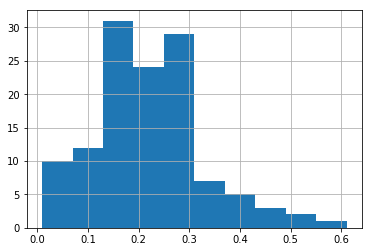

In [10]:
#pd.to_numeric(df['fractional shortening'])
pd.to_numeric(df['fractional shortening']).hist()

In [11]:
df['fractional shortening'] = pd.to_numeric(df['fractional shortening'])

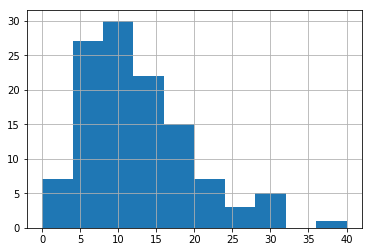

In [12]:
pd.to_numeric(df['epss']).hist()

In [13]:
df['epss'] = pd.to_numeric(df['epss'])

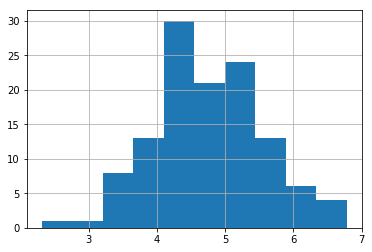

In [14]:
pd.to_numeric(df['lvdd']).hist()

In [15]:
df['lvdd'] = pd.to_numeric(df['lvdd'])

In [16]:
df['wall-motion-index'] = pd.to_numeric(df['wall-motion-index'])

Conversão para tipo categórico. Também seria possível utilizar o método `replace` em vez do `rename_categories`, antes de fazer a conversão de tipo.

In [17]:
df['alive-at-1'] = pd.Categorical(df['alive-at-1'])
df['alive-at-1'] = df['alive-at-1'].cat.rename_categories({'0': 'não', '1': 'sim'})

In [18]:
df['alive-at-1'].value_counts()

não    50
sim    24
Name: alive-at-1, dtype: int64

Note que a presença de dados faltantes como `np.nan` imlpica que a coluna de idade é do tipo real e não inteiro.

In [19]:
df.dtypes

age-at-heart-attack       float64
pericardial effusion        int64
fractional shortening     float64
epss                      float64
lvdd                      float64
wall-motion-index         float64
alive-at-1               category
dtype: object

Conversão para tipo booleano (verdadeiro/falso).

In [20]:
df['pericardial effusion'] = df['pericardial effusion'].astype(np.bool)
df.dtypes

age-at-heart-attack       float64
pericardial effusion         bool
fractional shortening     float64
epss                      float64
lvdd                      float64
wall-motion-index         float64
alive-at-1               category
dtype: object

In [21]:
df.describe(include='all')

,age-at-heart-attack,pericardial effusion,fractional shortening,epss,lvdd,wall-motion-index,alive-at-1
count,126.000000,131,124.000000,117.000000,121.000000,130.00000,74
unique,NaN,2,NaN,NaN,NaN,NaN,2
top,NaN,False,NaN,NaN,NaN,NaN,não
freq,NaN,107,NaN,NaN,NaN,NaN,50
mean,62.817460,NaN,0.216734,12.164769,4.763157,1.37800,NaN
std,8.342087,NaN,0.107513,7.370159,0.810013,0.45185,NaN
min,35.000000,NaN,0.010000,0.000000,2.320000,1.00000,NaN
25%,57.000000,NaN,0.150000,7.000000,4.230000,1.00000,NaN
50%,62.000000,NaN,0.205000,11.000000,4.650000,1.21600,NaN
75%,67.750000,NaN,0.270000,16.100000,5.300000,1.50750,NaN


### Tratamento de dados faltantes

In [22]:
df.isna() # refaz o DataFrame com valores True onde há dados faltantes

,age-at-heart-attack,pericardial effusion,fractional shortening,epss,lvdd,wall-motion-index,alive-at-1
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


Selecionando somente as linhas onde todos os dados estão presentes.

In [23]:
df[(df.notna()).all(axis=1)]

,age-at-heart-attack,pericardial effusion,fractional shortening,epss,lvdd,wall-motion-index,alive-at-1
0,71.0,False,0.260,9.000,4.600,1.000,não
1,72.0,False,0.380,6.000,4.100,1.700,não
2,55.0,False,0.260,4.000,3.420,1.000,não
3,60.0,False,0.253,12.062,4.603,1.450,não
4,57.0,False,0.160,22.000,5.750,2.250,não
5,68.0,False,0.260,5.000,4.310,1.000,não
6,62.0,False,0.230,31.000,5.430,1.875,não
7,60.0,False,0.330,8.000,5.250,1.000,não
8,46.0,False,0.340,0.000,5.090,1.140,não
9,54.0,False,0.140,13.000,4.490,1.190,não


In [24]:
df[(df.notna()).all(axis=1)].shape

(62, 7)

Selecionando somente as linhas onde a variável alvo não é faltante.

In [25]:
df[df['alive-at-1'].notna()]

,age-at-heart-attack,pericardial effusion,fractional shortening,epss,lvdd,wall-motion-index,alive-at-1
0,71.0,False,0.260,9.000,4.600,1.000,não
1,72.0,False,0.380,6.000,4.100,1.700,não
2,55.0,False,0.260,4.000,3.420,1.000,não
3,60.0,False,0.253,12.062,4.603,1.450,não
4,57.0,False,0.160,22.000,5.750,2.250,não
5,68.0,False,0.260,5.000,4.310,1.000,não
6,62.0,False,0.230,31.000,5.430,1.875,não
7,60.0,False,0.330,8.000,5.250,1.000,não
8,46.0,False,0.340,0.000,5.090,1.140,não
9,54.0,False,0.140,13.000,4.490,1.190,não


In [26]:
df[df['alive-at-1'].notna()].shape

(74, 7)

Criando um novo DataFrame que joga fora as linhas onde a variável alvo é faltante.

In [27]:
df_s = df.dropna(subset=['alive-at-1'])
df_s.describe(include='all')

,age-at-heart-attack,pericardial effusion,fractional shortening,epss,lvdd,wall-motion-index,alive-at-1
count,73.000000,74,70.000000,66.000000,68.000000,73.000000,74
unique,NaN,2,NaN,NaN,NaN,NaN,2
top,NaN,False,NaN,NaN,NaN,NaN,não
freq,NaN,59,NaN,NaN,NaN,NaN,50
mean,64.356164,NaN,0.219057,12.576636,4.785912,1.433795,NaN
std,8.342278,NaN,0.111263,7.271038,0.768589,0.462322,NaN
min,46.000000,NaN,0.010000,0.000000,3.420000,1.000000,NaN
25%,59.000000,NaN,0.150000,8.575000,4.260000,1.000000,NaN
50%,63.000000,NaN,0.218500,11.450000,4.601500,1.333000,NaN
75%,70.000000,NaN,0.270000,16.075000,5.392500,1.670000,NaN


Visualizando a única entrada onde a idade é faltante.

In [28]:
df_s[df_s['age-at-heart-attack'].isna()]

,age-at-heart-attack,pericardial effusion,fractional shortening,epss,lvdd,wall-motion-index,alive-at-1
76,NaN,False,0.26,19.4,4.77,2.1,sim


Método simples para imputar dados: usar uma medida de centralidade. Geralmente a mediana ou moda para valores discretos, e a média para valores contínuos.

In [29]:
(df_s['age-at-heart-attack'].mean(),
 df_s['age-at-heart-attack'].median(),
 df_s['age-at-heart-attack'].mode())

(64.356164383561648, 63.0, 0    63.0
 dtype: float64)

In [30]:
df_s['age-at-heart-attack'] = df_s['age-at-heart-attack'].fillna(63)

/home/diorge/.pyenv/versions/3.6.4/envs/jupyterexplore/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
df_s.describe()

,age-at-heart-attack,fractional shortening,epss,lvdd,wall-motion-index
count,74.000000,70.000000,66.000000,68.000000,73.000000
mean,64.337838,0.219057,12.576636,4.785912,1.433795
std,8.286442,0.111263,7.271038,0.768589,0.462322
min,46.000000,0.010000,0.000000,3.420000,1.000000
25%,59.000000,0.150000,8.575000,4.260000,1.000000
50%,63.000000,0.218500,11.450000,4.601500,1.333000
75%,70.000000,0.270000,16.075000,5.392500,1.670000
max,86.000000,0.610000,40.000000,6.730000,3.000000


Preenchendo todo o resto de dados faltantes com a média, pois faltaram somente os dados contínuos.

In [32]:
df_cheio = df_s.fillna(df_s.mean())
df_cheio.describe()

,age-at-heart-attack,fractional shortening,epss,lvdd,wall-motion-index
count,74.000000,74.000000,74.000000,74.000000,74.000000
mean,64.337838,0.219057,12.576636,4.785912,1.433795
std,8.286442,0.108172,6.861067,0.736326,0.459144
min,46.000000,0.010000,0.000000,3.420000,1.000000
25%,59.000000,0.150000,9.000000,4.290000,1.000000
50%,63.000000,0.219057,12.062500,4.685000,1.346500
75%,70.000000,0.267500,15.450000,5.307500,1.662500
max,86.000000,0.610000,40.000000,6.730000,3.000000


## Avaliação bivariada

Verificando algumas estatísticas quando os elementos são separados pela variável alvo.

In [33]:
#df_cheio.groupby('alive-at-1').mean()
df_cheio.groupby('alive-at-1').mean().T

alive-at-1,não,sim
age-at-heart-attack,62.920000,67.291667
pericardial effusion,0.140000,0.333333
fractional shortening,0.240142,0.175130
epss,11.182164,15.481788
lvdd,4.654476,5.059735
wall-motion-index,1.268640,1.777866


In [34]:
# permite visualizar DataFrames maiores
pd.set_option('display.max_rows', 200)

In [35]:
df_cheio.groupby('alive-at-1').describe(include='all').T

alive-at-1                         não        sim
age-at-heart-attack   count         50         24
                      unique       NaN        NaN
                      top          NaN        NaN
                      freq         NaN        NaN
                      mean       62.92    67.2917
                      std      7.99959    8.25401
                      min           46         56
                      25%           57      61.75
                      50%         61.5         64
                      75%         69.5       71.5
                      max           81         86
epss                  count         50         24
                      unique       NaN        NaN
                      top          NaN        NaN
                      freq         NaN        NaN
                      mean     11.1822    15.4818
                      std      5.59142    8.35281
                      min            0          0
                      25%          8.2      10.75
                      50%         10.6    12.6548
                      75%       13.075      19.55
                      max           31         40
fractional shortening count         50         24
                      unique       NaN        NaN
                      top          NaN        NaN
                      freq         NaN        NaN
                      mean    0.240142    0.17513
                      std     0.113654  0.0814826
                      min         0.03       0.01
                      25%         0.16     0.1275
                      50%        0.229       0.19
                      75%       0.2975       0.23
                      max         0.61        0.3
lvdd                  count         50         24
                      unique       NaN        NaN
                      top          NaN        NaN
                      freq         NaN        NaN
                      mean     4.65448    5.05974
                      std      0.70869   0.731461
                      min         3.42       3.52
                      25%       4.1775       4.65
                      50%        4.555    4.89296
                      75%        5.225     5.4625
                      max         6.29       6.73
pericardial effusion  count         50         24
                      unique         2          2
                      top        False      False
                      freq          43         16
                      mean         NaN        NaN
                      std          NaN        NaN
                      min          NaN        NaN
                      25%          NaN        NaN
                      50%          NaN        NaN
                      75%          NaN        NaN
                      max          NaN        NaN
wall-motion-index     count         50         24
                      unique       NaN        NaN
                      top          NaN        NaN
                      freq         NaN        NaN
                      mean     1.26864    1.77787
                      std     0.343138   0.485211
                      min            1          1
                      25%            1    1.43035
                      50%         1.14     1.6325
                      75%         1.43     2.1575
                      max          2.3          3

Visualizando gráfico de caixa de cada variável preditora, separada pela variável alvo.

/home/diorge/.pyenv/versions/3.6.4/envs/jupyterexplore/lib/python3.6/site-packages/pandas/plotting/_core.py:2065: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  return_type=return_type, **kwds)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9917c55320>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f9917b5c278>], dtype=object)

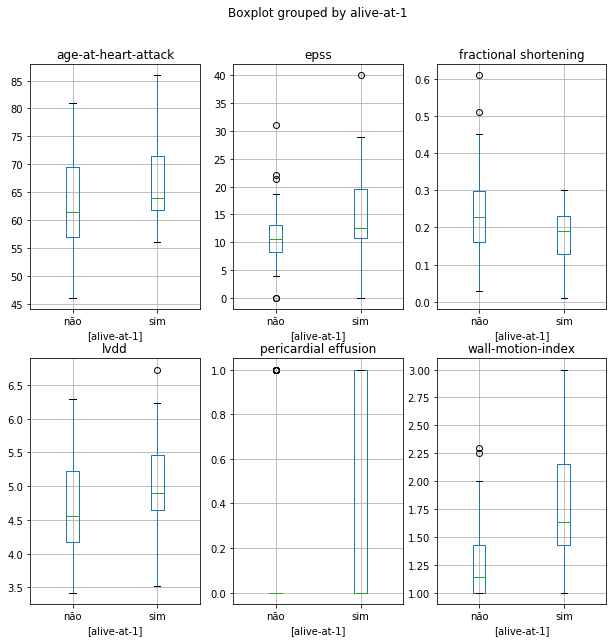

In [36]:
fig, ax = plt.subplots(2, 3, sharey=False, figsize=(10,10))
df_cheio.boxplot(by='alive-at-1', ax=ax)

### Teste de média

In [37]:
from scipy.stats import ttest_ind

Definir um valor de corte para o p-valor antes de realizar o teste. Valores comuns são 5% e 1% (ou seja, a média é considerada estatisticamente significantemente diferente se o p-valor $\leq 0.05$ ou $\leq 0.01$).

In [38]:
a = df_cheio.loc[df_cheio['alive-at-1'] == 'não', 'epss']
b = df_cheio.loc[df_cheio['alive-at-1'] == 'sim', 'epss']
# Student T
# ttest_ind(a, b)
# Welch T
ttest_ind(a, b, equal_var=False)

Ttest_indResult(statistic=-2.2877011171950596, pvalue=0.028649152386375932)

Testando para todos os atributos contínuos.

In [39]:
atributos = list(df_cheio.columns)
atributos.remove('alive-at-1')
atributos.remove('pericardial effusion')
atributos

['age-at-heart-attack',
 'fractional shortening',
 'epss',
 'lvdd',
 'wall-motion-index']

In [40]:
for atributo in atributos:
    a = df_cheio.loc[df_cheio['alive-at-1'] == 'não', atributo]
    b = df_cheio.loc[df_cheio['alive-at-1'] == 'sim', atributo]
    media, pvalor = ttest_ind(a, b, equal_var=False)
    print(atributo, pvalor)

age-at-heart-attack 0.0367205280764
fractional shortening 0.0066345262124
epss 0.0286491523864
lvdd 0.0292331472754
wall-motion-index 5.22976539428e-05


Assim, podemos aceitar com 99% de confiança (p-valor $\leq$ 0.01) que os atributos wall-motion-index e fractional-shortening tem sua média diferente de acordo com a variável alive-at-1.

## Random Forests

É possível utilizar florestas aleatórias para verificar quão importante um atributo é na separação da classe.

In [41]:
from sklearn.ensemble import RandomForestClassifier

A propriedade `.values` serve para converter a `pd.Series` para um `np.ndarray`.

In [42]:
df_x = df_cheio.drop(columns=['alive-at-1'])
x = df_x.values
atributos = df_x.columns
y = df_cheio['alive-at-1'].cat.codes.values

Os hiper-parâmetros da floresta aleatória são basicamente iguais aos da árvore de decisão, com adição do `n_estimators` que define quantas árvores serão geradas.

In [43]:
rfc = RandomForestClassifier(max_depth=2, n_estimators=20)
rfc.fit(x, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [44]:
import graphviz
from sklearn.tree import export_graphviz

Todas as árvores geradas estão disponíveis no atributo `.estimators_`.

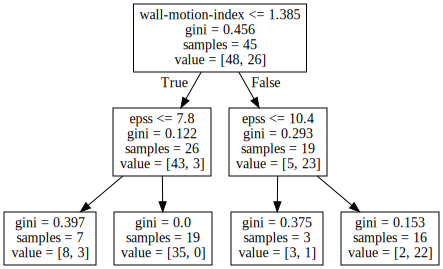

In [45]:
graphviz.Source(export_graphviz(rfc.estimators_[0],
                                out_file=None,
                                feature_names=atributos))

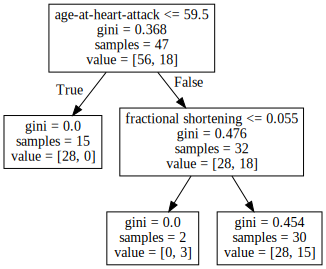

In [46]:
graphviz.Source(export_graphviz(rfc.estimators_[-1],
                                out_file=None,
                                feature_names=atributos))

In [47]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score

O método K-Fold é utilizado para gerar testes mais robustos, em especial com relação ao _overfitting_.

In [48]:
acuracias = []
for trainidx, testidx in StratifiedKFold(5).split(x, y):
    rfc = RandomForestClassifier(max_depth=2, n_estimators=20)
    rfc.fit(x[trainidx], y[trainidx])
    predicao = rfc.predict(x[testidx])
    
    acuracia = accuracy_score(y_pred=predicao, y_true=y[testidx])
    print('Acurácia', acuracia)
    acuracias.append(acuracia)
    print(confusion_matrix(y_pred=predicao, y_true=y[testidx]))

print('Acurácia média', np.mean(acuracias))

Acurácia 0.733333333333
[[8 2]
 [2 3]]
Acurácia 0.733333333333
[[9 1]
 [3 2]]
Acurácia 0.8
[[9 1]
 [2 3]]
Acurácia 0.733333333333
[[8 2]
 [2 3]]
Acurácia 0.785714285714
[[10  0]
 [ 3  1]]
Acurácia média 0.757142857143


Para testar a importância de atributos, é interessante que todas as árvores utilizem todos os atributos, por isso o hiper-parâmetro `max_features=None`.

In [49]:
rfc = RandomForestClassifier(max_depth=3,
                             n_estimators=20,
                             max_features=None)
rfc.fit(x, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

O atributo `feature_importances_` retorna uma lista com a importância relativa de cada atributo, com soma total 1.

In [53]:
df_importancia = pd.DataFrame({'atributo': atributos, 'importancia': rfc.feature_importances_})
#df_importancia
df_importancia.sort_values(by='importancia', ascending=False)

,atributo,importancia
5,wall-motion-index,0.471548
4,lvdd,0.186690
3,epss,0.133572
0,age-at-heart-attack,0.117056
2,fractional shortening,0.074869
1,pericardial effusion,0.016264


In [54]:
np.sum(rfc.feature_importances_)

1.0000000000000002